In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('customers.csv')

In [6]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [7]:
new_df = df.drop(["Channel", "Region"], axis='columns')

# UNDERSTANDING THE DATA

In [41]:
new_df.shape

(440, 6)

In [42]:
new_df.isnull().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

# Feature Scaling

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(new_df)

In [44]:
import pandas as pd
pd.DataFrame(df)

,0,1,2,3,4,5
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...
435,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


# KMEANS CLUSTERING

In [45]:
from sklearn.cluster import KMeans

In [46]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(new_df)
    wcss.append(km.inertia_)

C:\Users\abhis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [47]:
wcss

[157595857165.60907,
 113217528520.90994,
 80332413843.01636,
 64855545528.21103,
 53116919400.73704,
 47318144207.84124,
 41158638815.56955,
 38023913502.79173,
 32922134235.99973,
 30182762402.9242]

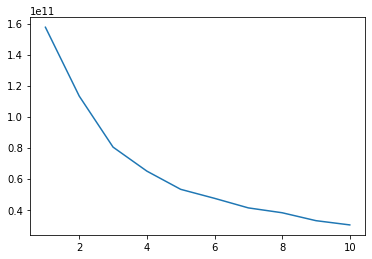

In [50]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)

In [23]:
km = KMeans(n_clusters=5)
y_means = km.fit_predict(new_df)

In [24]:
y_means

array([1, 1, 1, 3, 3, 1, 1, 1, 1, 4, 1, 1, 3, 3, 3, 1, 1, 1, 3, 1, 3, 1,
       3, 4, 3, 3, 1, 3, 4, 0, 3, 1, 3, 3, 1, 1, 3, 3, 4, 0, 3, 3, 4, 4,
       1, 4, 4, 2, 1, 4, 1, 1, 0, 4, 3, 1, 4, 4, 3, 1, 1, 2, 1, 4, 1, 4,
       1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 1, 4, 1, 1, 1, 4, 1, 3, 1, 2, 2, 0,
       1, 3, 1, 3, 4, 3, 4, 1, 1, 1, 1, 1, 4, 4, 1, 0, 3, 3, 1, 4, 1, 4,
       1, 4, 3, 3, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 0, 0, 3, 3, 1, 0, 1, 1,
       3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 0, 1, 3, 4, 1, 1, 1, 3, 3, 1, 3, 1,
       1, 4, 4, 3, 1, 4, 1, 1, 3, 4, 1, 4, 1, 1, 1, 1, 4, 4, 1, 4, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 4, 3, 3, 1, 4, 1, 3, 3, 1,
       1, 1, 4, 4, 3, 1, 1, 4, 1, 1, 1, 4, 3, 4, 1, 1, 1, 4, 4, 3, 4, 1,
       3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 0, 3, 3,
       3, 1, 1, 4, 1, 3, 3, 1, 1, 4, 1, 3, 1, 3, 1, 1, 0, 0, 1, 1, 3, 1,
       4, 4, 4, 3, 4, 3, 1, 1, 1, 0, 1, 1, 3, 1, 1, 3, 1, 1, 0, 3, 0, 0,
       1, 3, 3, 0, 1, 1, 1, 4, 3, 1, 3, 1, 1, 1, 3,

In [25]:
from sklearn.metrics import silhouette_score

In [26]:
score = silhouette_score(new_df, y_means)

In [27]:
score

0.3690214841962619

# HIERARCHICAL CLUSTERING

In [32]:
from sklearn.cluster import AgglomerativeClustering

In [33]:
clustering = AgglomerativeClustering().fit_predict(new_df)

In [34]:
clustering

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,

In [35]:
score = silhouette_score(new_df, clustering)

In [36]:
score

0.34471876450084604

# DBSCAN

In [37]:
from sklearn.cluster import DBSCAN

In [38]:
clustering = DBSCAN(eps=0.001, min_samples=6).fit_predict(new_df)

In [39]:
clustering

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [40]:
score = silhouette_score(new_df, clustering)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [29]:
score

0.34471876450084604